# Visualizing a genome using ggplot

In this post I am walking through the rather simple techniques I use for graphing chromosomes and displaying important information on top of them, including points to represent the locations of molecular markers and segments to highlight important regions of the genome.

First off we import the libraries we will be using

In [1]:
library(tidyverse) #this is how I load ggplot2, you can also use library(ggplot2)
library(ggthemes)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Chromosome data - file structure

Here I import a csv file containing the data needed for building the chromosome plot. I am working with the Arctic charr genome (organism of study for my PhD) but this can be substituted for any genome of your choosing. All you need is two columns: one with the name of each chromosome and one with the base pair length of each chromosome. If you have a genome you want to plot but don't have this information then you can obtain it from [NCBI](https://www.ncbi.nlm.nih.gov/genome). For example [on this page I searched for the platypus genome](https://www.ncbi.nlm.nih.gov/assembly/GCA_000002275.2). You can see at the bottom of the page there is an 'Assembly statistics' tab. Downloading that data and saving it as a .csv will give you all the info you need to plot the chromosomes.

In [3]:
chr_dat = read_csv('data/chromosome_dat_example.csv') #this is the tidyverse version of read.csv I personally have started using it because I 
                    #find it does a better job of identifying and parsing columns with factors, numbers etc. than the base function

Parsed with column specification:
cols(
  chr_name = col_character(),
  chr_len = col_integer()
)


Here is the Arctic charr genome information. Note the chr_dat column is factors.

In [4]:
head(chr_dat)

chr_name,chr_len
AC01,58017395
AC02,43538721
AC03,36001405
AC04p,28292882
AC04q.1:29,90519428
AC04q.2,29595583


## Plotting the chromosomes

Below I build a variable named genome_base that stores the plot. Using geom_bar, we draw the lines for each of the chromosomes at their respective points along the x axis (x = chr_name) and the height of the bars is designated by the length of the chromsomes (y = chr_len).

The other options are purely aesthetic, altering the width of the bars, changing the colour to grey, adding titles and then using ggthemes to alter the ggplot default aesthetics. The final command turns the labels 90 degrees so that the chromosome names do not overlap. All of the options can be tinkered with to alter how the plot's looks to fit your needs.

In [5]:
genome_base = ggplot(NULL) +
    geom_bar(data = chr_dat, 
            aes(x = chr_name, y = chr_len) , 
            stat='identity', 
            fill='grey80', 
            colour='grey80', 
            width=.2) +
    labs(y = "Base pair position", 
            x = "Arctic charr chromosome") +
    theme_minimal() +
    theme_light() +
    theme(panel.border = element_blank(),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank()) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
        axis.ticks.x = element_blank())


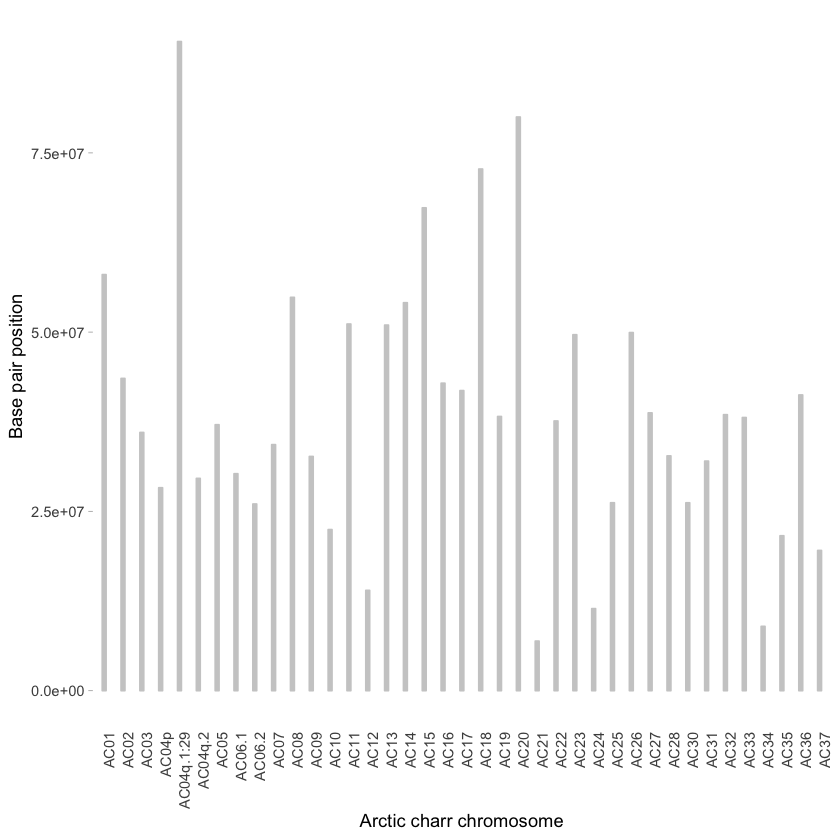

In [6]:
genome_base

## Adding information on top of the chromosomes 

In [7]:
important_segments = read_csv('data/seg_locations_example.csv')

Parsed with column specification:
cols(
  chr_name = col_character(),
  mb_start = col_integer(),
  mb_end = col_integer()
)


In [8]:
head(important_segments)

chr_name,mb_start,mb_end
AC04q.1:29,26000000,26999999
AC04q.1:29,27000000,27999999
AC04q.1:29,33000000,33999999
AC04q.2,16000000,16999999
AC06.1,27000000,27999999
AC07,8000000,8999999


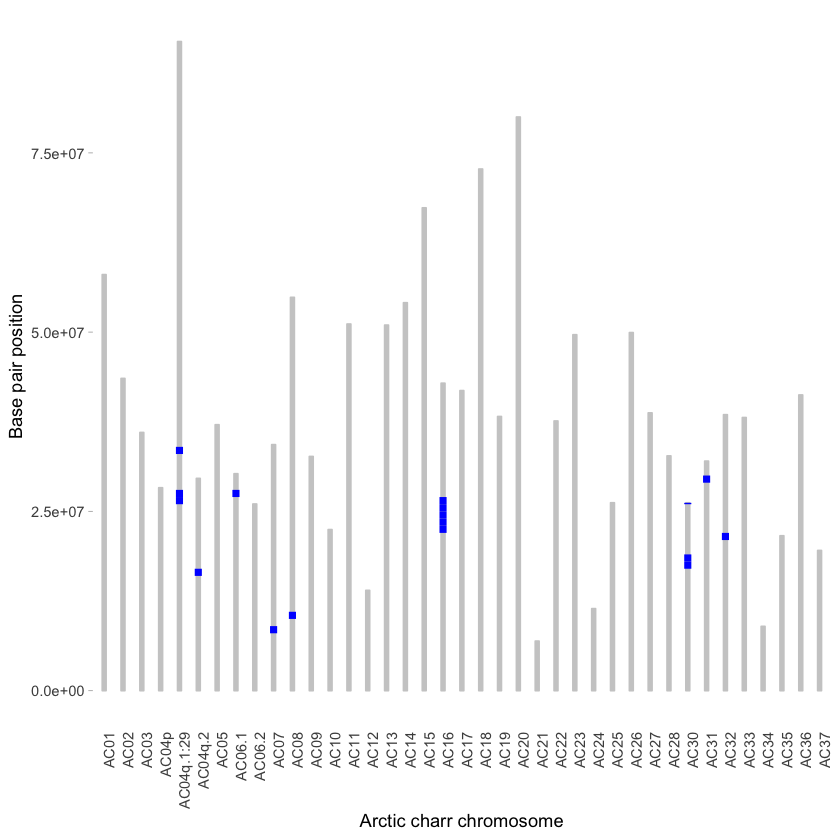

In [9]:
seg_example = genome_base + 
    geom_segment(data = important_segments, 
        aes(x=chr_name, xend=chr_name, y=mb_start, yend=mb_end), 
        color='blue', 
        size = 2)

seg_example

In [10]:
points_example = read_csv('data/snp_locations_example.csv')

Parsed with column specification:
cols(
  SNP_ID = col_integer(),
  chr_name = col_character(),
  POS = col_integer()
)


In [11]:
head(points_example)

SNP_ID,chr_name,POS
1,AC01,49371130
2,AC01,31726846
3,AC01,28413693
4,AC01,28382714
5,AC01,6106981
6,AC01,33305721


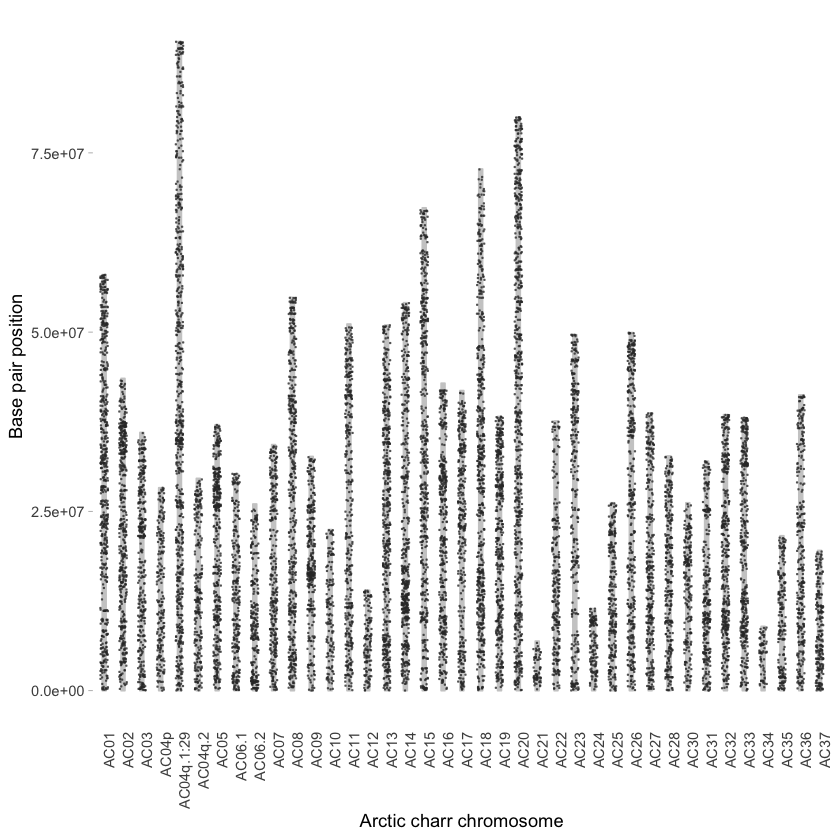

In [12]:
marker_locations = genome_base + 
    geom_point(data = points_example, 
        aes(x=chr_name, y=POS), 
        color="grey20",
        shape=22,
        size=.001,
        alpha = 0.8, 
        position=position_jitter(.2))

marker_locations

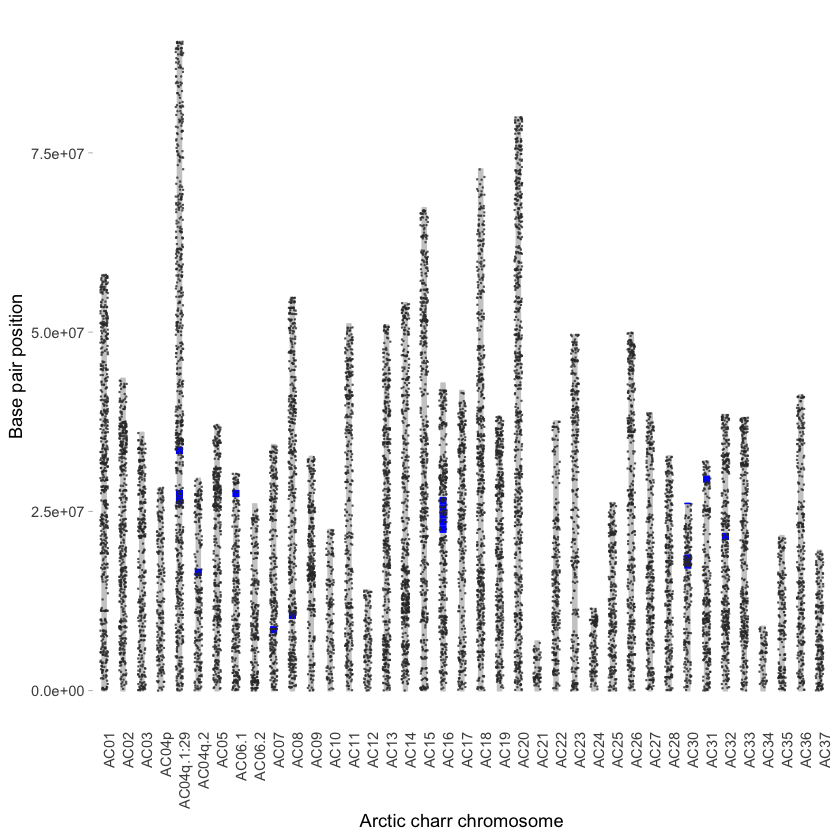

In [13]:
ensemble =  genome_base +
    geom_segment(data = important_segments, 
        aes(x=chr_name, xend=chr_name, y=mb_start, yend=mb_end), 
        color='blue', 
        size = 2) + 
    geom_point(data = points_example, 
        aes(x=chr_name, y=POS), 
        color="grey20",
        shape=22,
        size=.001,
        alpha = 0.8, 
        position=position_jitter(.2))

ensemble

## In conclusion